<a href="https://colab.research.google.com/github/Tanisha-vernekar/Tanishadev/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive.zip to archive (1).zip
Loaded archive (1).zip with shape: (303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:41:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


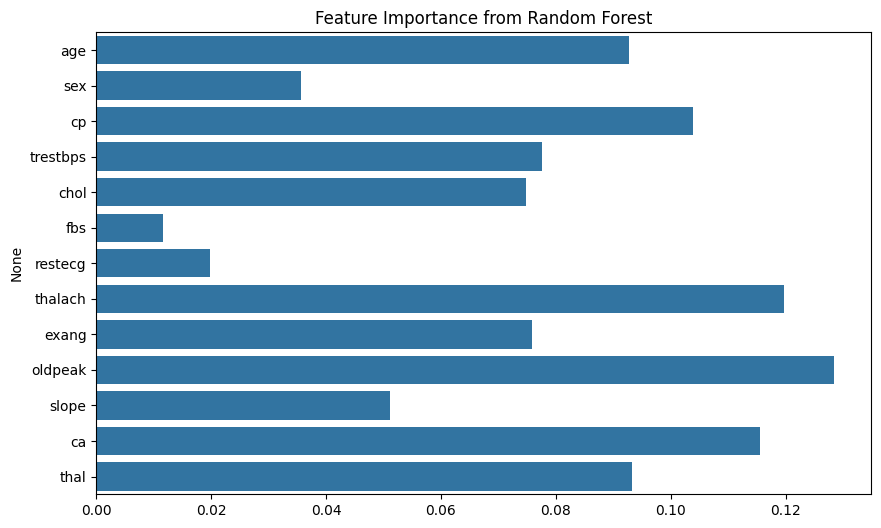

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Load the dataset into a DataFrame
for filename in uploaded.keys():
    data = pd.read_csv(filename)
    print(f"Loaded {filename} with shape: {data.shape}")

# Explore the dataset
print(data.head())
print(data.info())

# Assuming 'target' is the column for heart disease presence
X = data.drop('target', axis=1)  # Features
y = data['target']                # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models to evaluate
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}

# Function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"{name} Results:")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print(f"Accuracy: {model.score(X_test, y_test):.4f}\n")

# Train and evaluate both models
train_and_evaluate(models, X_train, X_test, y_train, y_test)

# Feature Importance from Random Forest
importance_rf = models["Random Forest"].feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_rf, y=features)
plt.title('Feature Importance from Random Forest')
plt.show()
